In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("updated_winery_dataset_categorized.csv")

In [3]:
df.head()

,id,country,description,points,price,province,variety,winery,category
0,0,US,This tremendous 100% varietal wine hails from ...,96,235,California,Cabernet Sauvignon,Heitz,red
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,red
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90,California,Sauvignon Blanc,Macauley,white
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65,Oregon,Pinot Noir,Ponzi,red
4,4,France,"This is the top wine from La Bégude, named aft...",95,66,Provence,Provence red blend,Domaine de la Bégude,red


Text(0.5, 1.0, 'Correlation Between Average Points and Price per Country')

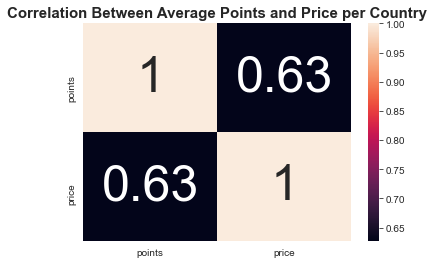

In [339]:
pc = mean_per_country[['points','price','country']].corr(method ='pearson')

cols = ['points','price']

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50})
plt.title("Correlation Between Average Points and Price per Country", fontdict = {'fontsize' : 15,
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})

In [90]:
avg_points_per_price = df.groupby(['price']).mean().reset_index()
avg_points_per_price

,price,id,points
0,4,74309.586207,84.482759
1,5,91744.939850,83.473684
2,6,85581.864368,83.767816
3,7,80879.975589,84.313131
4,8,80793.085149,84.577822
...,...,...,...
410,2000,89458.000000,96.500000
411,2013,66854.500000,91.000000
412,2300,34920.000000,99.000000
413,2500,57110.000000,96.000000


Text(-1.9500000000000064, 0.5, 'Average Points')

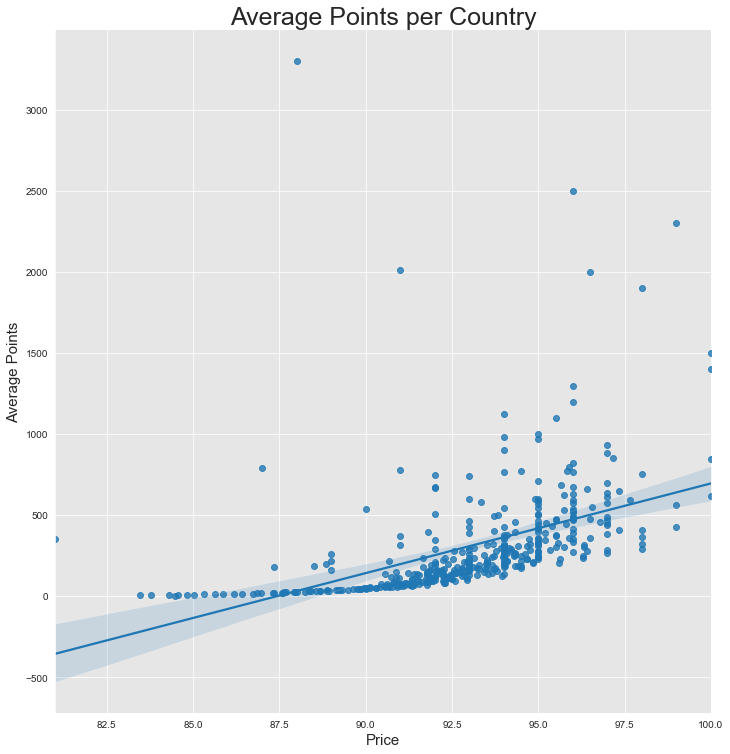

In [107]:
# f2_dims = (15, 10)
# fig, ax = plt.subplots(figsize=f2_dims)
ax = sns.lmplot(x="points", y="price", data=avg_points_per_price, height = 10)
# sns.set_style("whitegrid")
# sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title("Average Points per Country", fontdict = {'fontsize': 25})
plt.xlabel("Price", fontdict = {'fontsize': 15})
plt.ylabel("Average Points", fontdict = {'fontsize': 15})

In [115]:
avg_points_per_price_category = df.groupby(['category', 'price']).mean().reset_index()
avg_points_per_price_category

,category,price,id,points
0,other,7,106436.000000,86.000000
1,other,8,65563.000000,83.000000
2,other,9,67200.555556,86.666667
3,other,10,57126.000000,84.454545
4,other,11,64263.583333,84.875000
...,...,...,...,...
811,white,932,54298.000000,97.000000
812,white,1000,52523.500000,94.000000
813,white,1100,50064.500000,94.000000
814,white,1400,53906.000000,100.000000


Text(10.397404513888894, 0.5, 'Average Points')

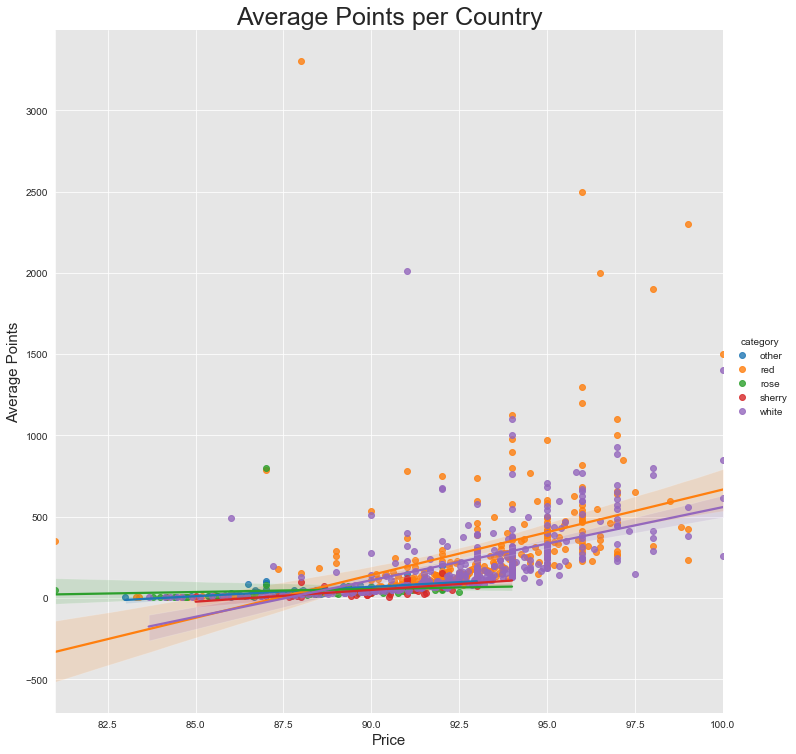

In [116]:
# f2_dims = (15, 10)
# fig, ax = plt.subplots(figsize=f2_dims)
ax = sns.lmplot(x="points", y="price", data=avg_points_per_price_category, hue = 'category', height = 10)
# sns.set_style("whitegrid")
# sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title("Average Points per Country", fontdict = {'fontsize': 25})
plt.xlabel("Price", fontdict = {'fontsize': 15})
plt.ylabel("Average Points", fontdict = {'fontsize': 15})

Text(0, 0.5, 'Average Points')

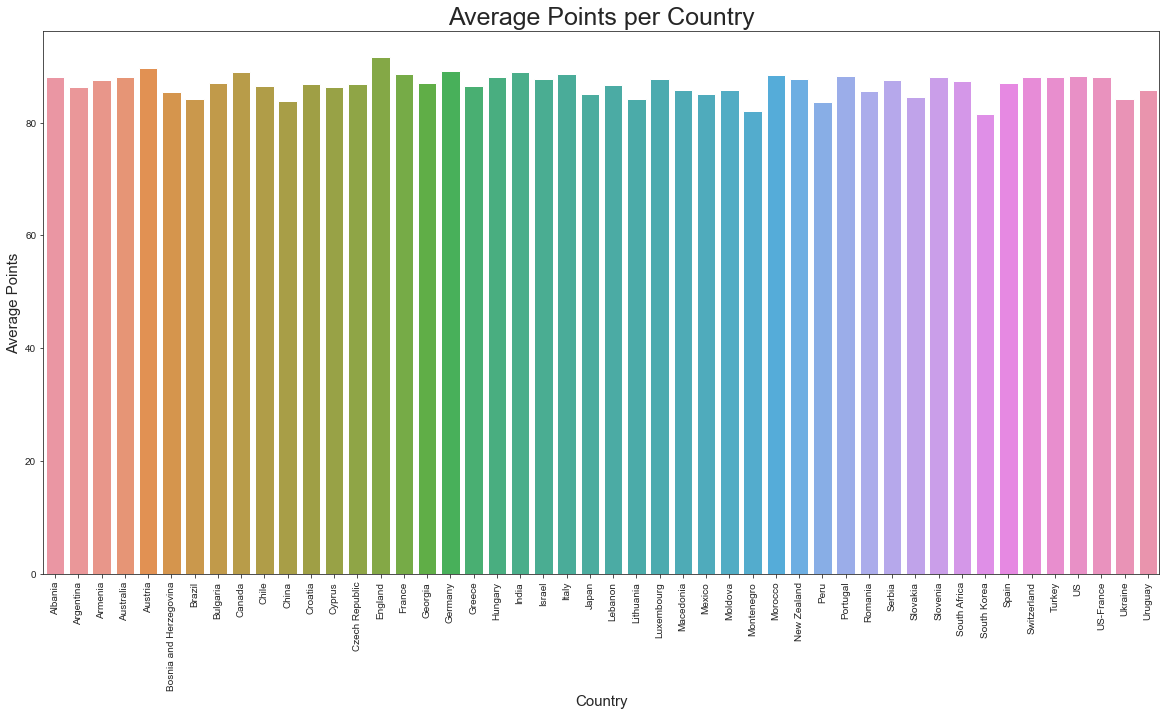

In [306]:
#Country with the best average rated wine
f1_dims = (20, 10)
fig, ax = plt.subplots(figsize=f1_dims)
ax = sns.barplot(x="country", y="points", data=mean_per_country, ci=False)
sns.set_style("whitegrid")
sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xticks(rotation=90)
plt.title("Average Points per Country", fontdict = {'fontsize': 25})
plt.xlabel("Country", fontdict = {'fontsize': 15})
plt.ylabel("Average Points", fontdict = {'fontsize': 15})

In [331]:

mean_per_country = df.groupby(['country']).mean().reset_index()
mean_per_country = mean_per_country.drop(columns = 'id')

mean_per_country

,country,points,price
0,Albania,88.000000,20.000000
1,Argentina,86.286204,22.288451
2,Armenia,87.500000,14.500000
3,Australia,88.109349,32.592237
4,Austria,89.720750,30.964597
5,Bosnia and Herzegovina,85.333333,12.666667
6,Brazil,84.166667,22.430556
7,Bulgaria,87.064220,13.550459
8,Canada,88.877232,35.243304
9,Chile,86.383558,19.970337


In [127]:
s = df.groupby(['category', 'variety']).points.mean()
s

category  variety               
other     Braucol                   90.500000
          Carineña                  85.666667
          Carricante                89.864407
          Cayuga                    84.200000
          Chinuri                   86.000000
                                      ...    
white     Zibibbo                   89.983051
          Zierfandler               89.857143
          Zierfandler-Rotgipfler    90.833333
          Zlahtina                  86.000000
          Žilavka                   87.333333
Name: points, Length: 739, dtype: float64

In [222]:
s2 = s.groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index()

,category,variety,points
0,other,Braucol,90.500000
1,other,Carricante,89.864407
2,other,Mavrotragano,90.000000
3,other,Sirica,92.750000
4,other,Vidal,89.866667
5,red,Blauburgunder,93.000000
6,red,Cabernet-Shiraz,92.666667
7,red,Garnacha-Cariñena,93.000000
8,red,Ramisco,93.000000
9,red,Tinta del Pais,95.000000


(-1.0, 21.0)

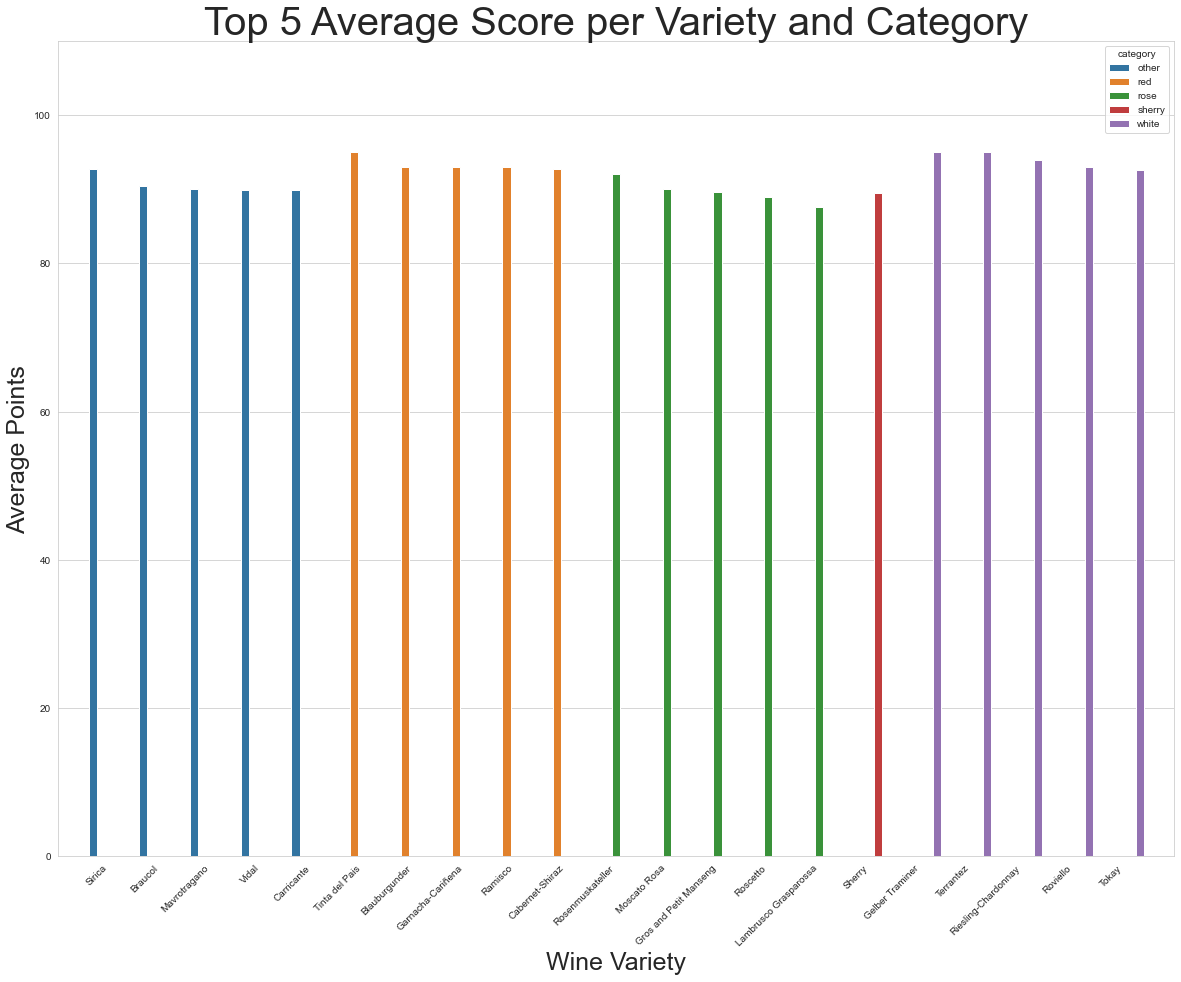

In [323]:
# Variety of wine with highest average rating


f1_dims = (20, 15)
fig, ax = plt.subplots(figsize=f1_dims)







ax = sns.barplot(x = 'variety', y="points", data=s2, ci=False, hue = "category")
# sns.set_style("ticks")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_style("whitegrid")
plt.title("Average Points per Country")
plt.title("Top 5 Average Score per Variety and Category", fontdict = {'fontsize': 40})
plt.xlabel("Wine Variety", fontdict = {'fontsize': 25})
plt.ylabel("Average Points", fontdict = {'fontsize': 25})
plt.ylim((0, 110))
plt.xlim((-1, 21))
# plt.grid()